## NPLife Engine
GOAL: Make a randomly-generated field of nanoparticles in SPM data (height-based)

[(How to generate a random binary image)](https://stackoverflow.com/questions/61825918/how-to-generate-a-random-binary-image)

[(Conway's Game of Life Engine: an example)](https://beltoforion.de/en/recreational_mathematics/game_of_life.php)

**install the following stuff before running anything:**
pillow, pygame, numpy, matplotlib, opencv

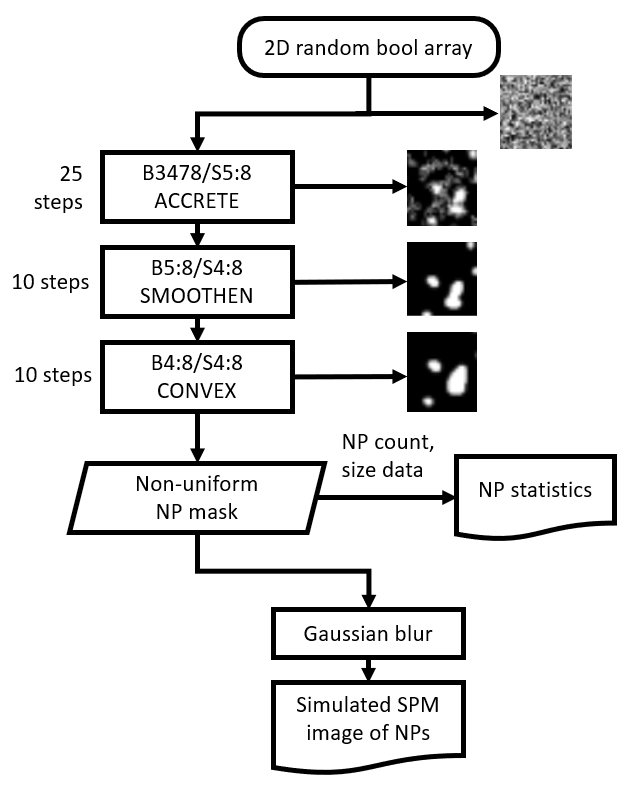

In [1]:
from IPython.display import Image
Image(filename='Flowchart1.png')

In [ ]:
import pygame
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Global Variables
IMGSIZE = 280
SIMSIZE = 300
col_about_to_die = (200, 200, 225)
col_alive = (255, 255, 215)
col_background = (10, 10, 40)
col_grid = (30, 30, 60)

def update(surface, cur, sz, B, S):
    nxt = np.zeros((cur.shape[0], cur.shape[1]))

    for r, c in np.ndindex(cur.shape):
        num_alive = np.sum(cur[r-1:r+2, c-1:c+2]) - cur[r, c]

        if (cur[r, c] == 1 and num_alive not in S):
            col = col_about_to_die
        elif (cur[r, c] == 1 and num_alive in S) or (cur[r, c] == 0 and num_alive in B):
            nxt[r, c] = 1
            col = col_alive

        col = col if cur[r, c] == 1 else col_background
        pygame.draw.rect(surface, col, (c*sz, r*sz, sz, sz))

    return nxt

# Initial pattern (2D random bool array)
def init(dimx, dimy):
    cells = np.zeros((dimy, dimx))
    pattern = np.random.randint(2, size=(IMGSIZE,IMGSIZE)).astype(bool);
    img =  Image.fromarray(pattern)
    img.save("0-boolaray.png", bits=1,optimize=True) # save image
    
    # pattern offset from edge of the universe
    margin = int((SIMSIZE-IMGSIZE)/2)
    pos = (margin,margin) 
    
    # draw pattern
    cells[pos[0]:pos[0]+pattern.shape[0], pos[1]:pos[1]+pattern.shape[1]] = pattern
    
    return cells

def main(dimx, dimy, cellsize):
    pygame.init()
    surface = pygame.display.set_mode((dimx * cellsize, dimy * cellsize))
    pygame.display.set_caption("NPLife Engine")

    cells = init(dimx, dimy) # initialize cells
    
    # Loop 25 steps, instaclumper
    for x in range(25):
        cells = update(surface, cells, cellsize, {3,4,7,8}, {5,6,7,8})
        pygame.display.update()
        
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("1-accrete.png", bits=1,optimize=True) # save image
        
    # Loop 10 steps, smoothen
    for x in range(4):
        cells = update(surface, cells, cellsize, {5,6,7,8}, {4,5,6,7,8})
        pygame.display.update()
        
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("2-smoothen.png", bits=1,optimize=True) # save image
        
    # Loop 10 steps, convex
    for x in range(10):
        cells = update(surface, cells, cellsize, {4,5,6,7,8}, {4,5,6,7,8})
        pygame.display.update()
        
    # Export the image
    npcells = np.array(cells)
    img = Image.fromarray(npcells.astype(bool))
    img.save("3-convex-mask.png", bits=1,optimize=True) # save image
    
    # Exit condition: Game ends when you click exit
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

if __name__ == "__main__":
    main(SIMSIZE, SIMSIZE, 3)
    
plt.subplot(141),plt.imshow(Image.open("0-boolaray.png")),plt.title('Random Bool')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(Image.open("1-instaclumper.png")),plt.title('Instaclumper')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(Image.open("2-smoothen.png")),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(Image.open("3-convex-mask.png")),plt.title('Convex')
plt.xticks([]), plt.yticks([])
plt.show()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


## OpenCV chapter:
** Mask statistics **
** Gaussian Blurring**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('3-convex-mask.png')
blur = cv.blur(img,(7,7))

# Export the image
img1 = Image.fromarray(blur)
img1.save("4-blur.png", bits=1,optimize=True) # save image
    
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

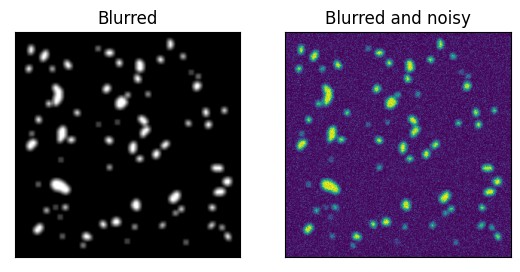

In [7]:
from PIL import Image
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.util import random_noise

im = Image.open("4-blur.png")
# convert PIL Image to ndarray
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
noise_img = random_noise(im_arr, mode='gaussian', var=0.15**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)

# Export the image
img.save("5-noise.png", bits=1,optimize=True) # save image
image = cv.imread('5-noise.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2 = Image.fromarray(gray)
img2.save("6-noise-grayscale.png", bits=1,optimize=True) # save image

plt.subplot(121),plt.imshow(im),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2),plt.title('Blurred and noisy')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#https://stackoverflow.com/questions/65169869/detecting-and-counting-blobs-connected-objects-with-opencv
import cv2 as cv
import numpy as np

# read input image
img = cv.imread('3-convex-mask.png')

# convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# threshold to binary
thresh = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)[1]

# find contours
#label_img = img.copy()
contour_img = img.copy()
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
index = 1
isolated_count = 0
cluster_count = 0
for cntr in contours:
    area = cv.contourArea(cntr)
    convex_hull = cv.convexHull(cntr)
    convex_hull_area = cv.contourArea(convex_hull)
    ratio = area / convex_hull_area
    #print(index, area, convex_hull_area, ratio)
    #x,y,w,h = cv.boundingRect(cntr)
    #cv.putText(label_img, str(index), (x,y), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255), 2)
    if ratio < 0.91:
        # cluster contours in red
        cv.drawContours(contour_img, [cntr], 0, (0,0,255), 2)
        cluster_count = cluster_count + 1
    else:
        # isolated contours in green
        cv.drawContours(contour_img, [cntr], 0, (0,255,0), 2)
        isolated_count = isolated_count + 1
    index = index + 1
    
print('number_clusters:',cluster_count)
print('number_isolated:',isolated_count)

# save result
cv.imwrite("blobs_connected_result.jpg", contour_img)

# show images
plt.imshow(contour_img),plt.title('Clusters and Single NPS')
plt.xticks([]), plt.yticks([])
plt.show()


SimpleBlobDetector (might come into use???)

In [ ]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread("3-convex-mask.png")

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

Area Statistics [(Statistics example)](https://stackoverflow.com/questions/58068315/calculate-the-area-of-the-masks-in-pixels-in-grey-scale-images-with-python)

4663


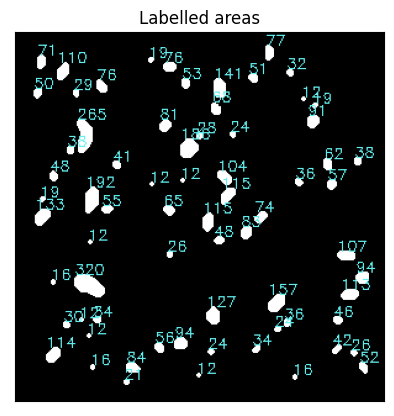

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('3-convex-mask.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
total = 0

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.fillPoly(mask, [c], [255,255,255])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    pixels = cv2.countNonZero(mask)
    total += pixels
    cv2.putText(image, '{}'.format(pixels), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (100,240,240), 1)

print(total)

plt.imshow(image),plt.title('Labelled areas')
plt.xticks([]), plt.yticks([])
plt.show()

connectedComponentsWithStats official documentation: [(click here)](https://docs.opencv.org/3.3.1/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f)

connectedComponentsWithStats example and more helpful details: [(click here)](https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python)

In [18]:
import cv2
import numpy

frame = cv2.imread('3-convex-mask.png')

if frame is None:
    print('Error loading image')
    exit()

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# PErform the operation
output = cv2.connectedComponentsWithStats(frame, 8, cv2.CV_32S)

# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]


# Data print
print("Number of labels: ", num_labels)
print("Label matrix: \n", labels)
print("Stat matrix (column 5 is area): \n", stats)
print("Centroids: \n", centroids)

Number of labels:  71
Label matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Stat matrix (column 5 is area): 
 [[    0     0   300   300 85337]
 [  203    11     7    13    77]
 [   18    19     7    12    71]
 [  108    21     5     5    19]
 [   34    25    10    15   110]
 [  120    25    11     8    76]
 [  220    30     6     7    32]
 [  189    34     8     8    51]
 [   66    39     9    11    76]
 [  135    38     7     9    53]
 [  161    38    10    16   141]
 [   15    46     7     9    50]
 [   47    47     5     7    29]
 [  232    53     4     4    12]
 [  159    57     8    11    68]
 [  241    58     5     5    19]
 [  237    68    10    11    91]
 [   50    71    13    28   265]
 [  117    71    10    11    81]
 [  174    81     5     6    24]
 [  147    82     6     6    28]
 [  134    87    15    16   186]
 [   42    93     6     7    38]
 [  250   103     7    10    62]
 [  275   102   